# Loan Prediction Model

The dataset contains Demographic information of the customer and the Amount of loan that will get approve.

Dataset Source: Vidyanlaytics

### Independent Variables : 
        Gender	
        Married	
        Dependents	
        Education	
        Self_Employed	
        ApplicantIncome	
        CoapplicantIncome	
        LoanAmount	
        Loan_Amount_Term	
        Credit_History	
        Property_Area


### Dependent Variable : 
        Loan_Status

### Problem Type : 
        Status Prediction Model

### ML algorithm used :
        Logistic Classification

#### Loading Libraries

In [ ]:
!pip install datatile

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datatile.summary.df import DataFrameSummary
import seaborn as sns

#### Reading Dataset

In [4]:
df_raw_data = pd.read_csv("train_data.csv")

In [6]:
dfs = DataFrameSummary(df_raw_data)
dfs.summary()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,NaN,NaN,NaN,NaN,NaN,NaN,614,614,592,600,564,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.46,1621.25,146.412,342,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.04,2926.25,85.5873,65.1204,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150,0,9,12,0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.5,0,100,360,1,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.5,1188.5,128,360,1,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795,2297.25,168,360,1,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,81000,41667,700,480,1,NaN,NaN
counts,614,601,611,599,614,582,614,614,592,600,564,614,614
uniques,614,2,2,4,2,2,505,287,203,10,2,3,2


In [7]:
df_raw_data_clean = df_raw_data.dropna(axis=0)

In [8]:
dfs_1 = DataFrameSummary(df_raw_data_clean)
dfs_1.summary()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,NaN,NaN,NaN,NaN,NaN,NaN,480,480,480,480,480,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,5364.23,1581.09,144.735,342.05,0.854167,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,5668.25,2617.69,80.5082,65.2124,0.353307,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150,0,9,36,0,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2898.75,0,100,360,1,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3859,1084.5,128,360,1,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5852.5,2253.25,170,360,1,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,81000,33837,600,480,1,NaN,NaN
counts,480,480,480,480,480,480,480,480,480,480,480,480,480
uniques,480,2,2,4,2,2,405,232,186,9,2,3,2


In [11]:
sum(df_raw_data_clean['Loan_Status']=="Y")/df_raw_data_clean.shape[0]

0.6916666666666667

In [12]:
df_raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
v1 = df_raw_data_clean['Gender'].value_counts(normalize=True)
type(v1)

pandas.core.series.Series

In [131]:
df_raw_data_clean['Credit_History'].value_counts()

1.0    410
0.0     70
Name: Credit_History, dtype: int64

In [132]:
cat_var = ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Status']

def generate_class_table(dataframe, target_column):
    class_table = pd.DataFrame(columns=['Column Name', 'Classes', 'Count', 'Percentage', 'Y Percentage'])

    for column in cat_var:
        classes = dataframe[column].value_counts()
        total_count = classes.sum()
        percentages = (classes / total_count) * 100

        y_counts = dataframe[dataframe[target_column] == 'Y'][column].value_counts()
        y_percentage = (y_counts / total_count) * 100

        for class_value, count, percentage, y_percent in zip(
            classes.index, classes.values, percentages.values, y_percentage.values
        ):
            class_table = class_table.append({
                'Column Name': column,
                'Classes': class_value,
                'Count': count,
                'Percentage': round(percentage, 2),
                'Y Percentage': round(y_percent, 2)
            }, ignore_index=True)

    return class_table

In [133]:
summary_1 = generate_class_table(df_raw_data_clean,"Loan_Status")
summary_1

,Column Name,Classes,Count,Percentage,Y Percentage
0,Gender,Male,394,82.08,57.92
1,Gender,Female,86,17.92,11.25
2,Married,Yes,311,64.79,47.29
3,Married,No,169,35.21,21.88
4,Dependents,0,274,57.08,38.96
5,Dependents,2,85,17.71,13.54
6,Dependents,1,80,16.67,10.83
7,Dependents,3,41,8.54,5.83
8,Education,Graduate,383,79.79,56.46
9,Education,Not Graduate,97,20.21,12.71


In [169]:
with pd.ExcelWriter('output.xlsx') as writer:
	summary_1.to_excel(writer, sheet_name='Categorical_var_analysis')

In [134]:
df = df_raw_data_clean

In [135]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

ApplicantIncome


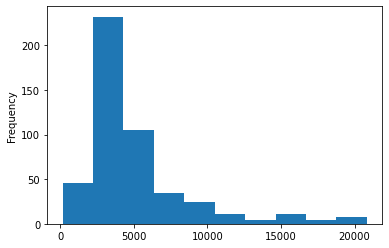

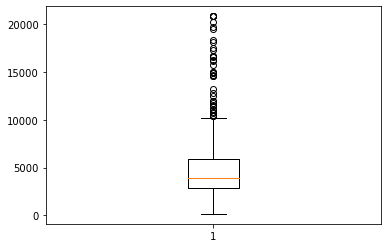

CoapplicantIncome


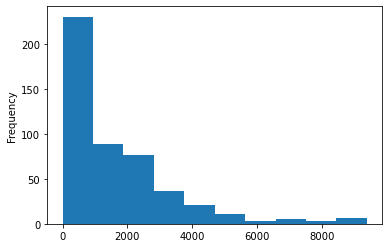

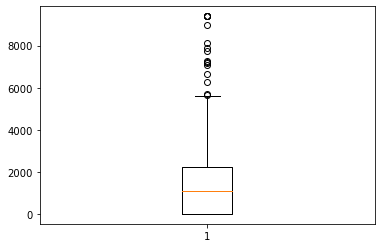

LoanAmount in thousands


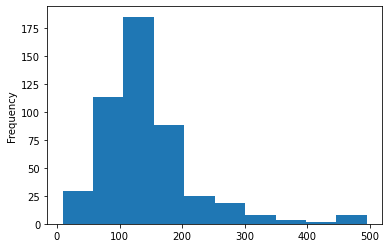

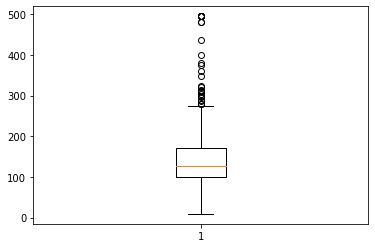

Loan_Amount_Term in months


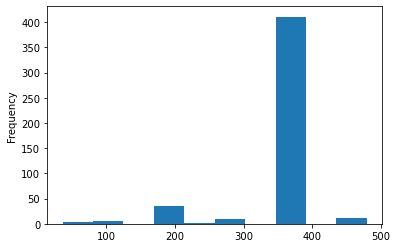

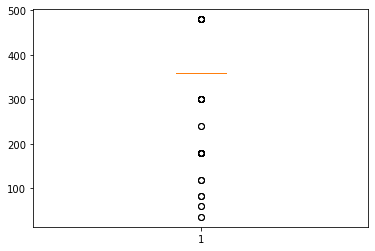

In [136]:
print("ApplicantIncome")
plt.show(df["ApplicantIncome"].plot.hist())
plt.show(plt.boxplot(df["ApplicantIncome"]))
print("CoapplicantIncome")
plt.show(df["CoapplicantIncome"].plot.hist())
plt.show(plt.boxplot(df["CoapplicantIncome"]))
print("LoanAmount in thousands")
plt.show(df["LoanAmount"].plot.hist())
plt.show(plt.boxplot(df["LoanAmount"]))
print("Loan_Amount_Term in months")
plt.show(df["Loan_Amount_Term"].plot.hist())
plt.show(plt.boxplot(df["Loan_Amount_Term"]))

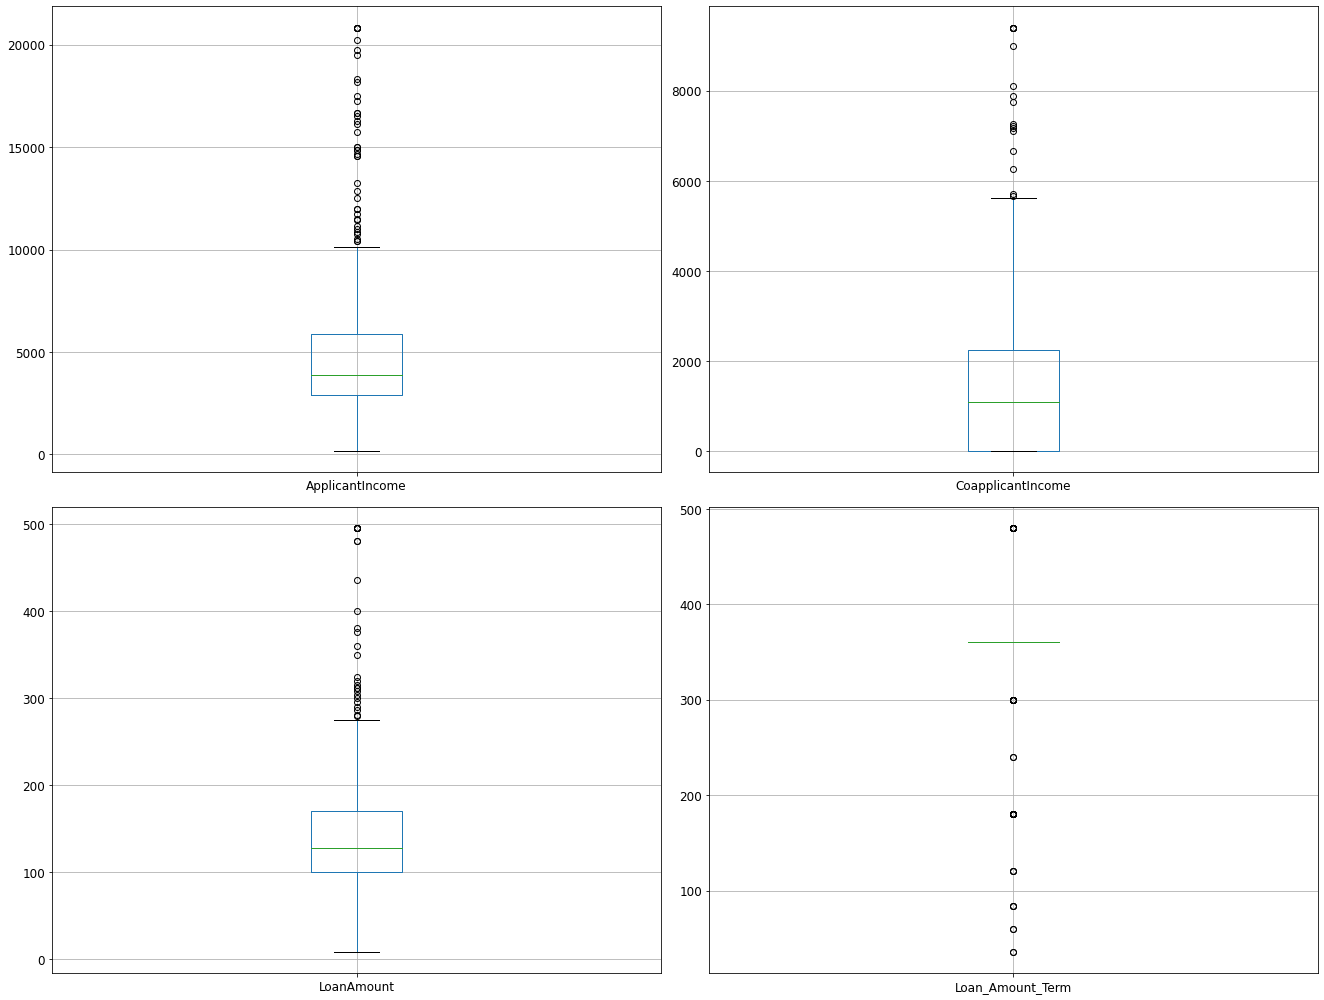

In [137]:
continuous_vars = [
    "ApplicantIncome","CoapplicantIncome",'LoanAmount',
       'Loan_Amount_Term'
]

fig, axes = plt.subplots(2,2)

for i, el in enumerate(list(df[continuous_vars].columns.values)):
    a=df.boxplot(el, ax=axes.flatten()[i], fontsize='large')

fig.set_size_inches(18.5, 14)
plt.tight_layout()
plt.show()

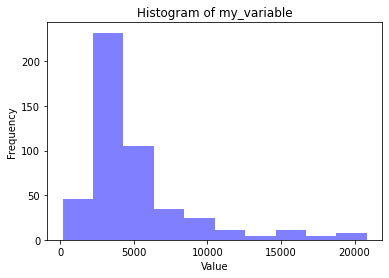

In [138]:
# Plot a histogram of the variable 'my_variable'


plt.hist(df['ApplicantIncome'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of my_variable')

plt.show()

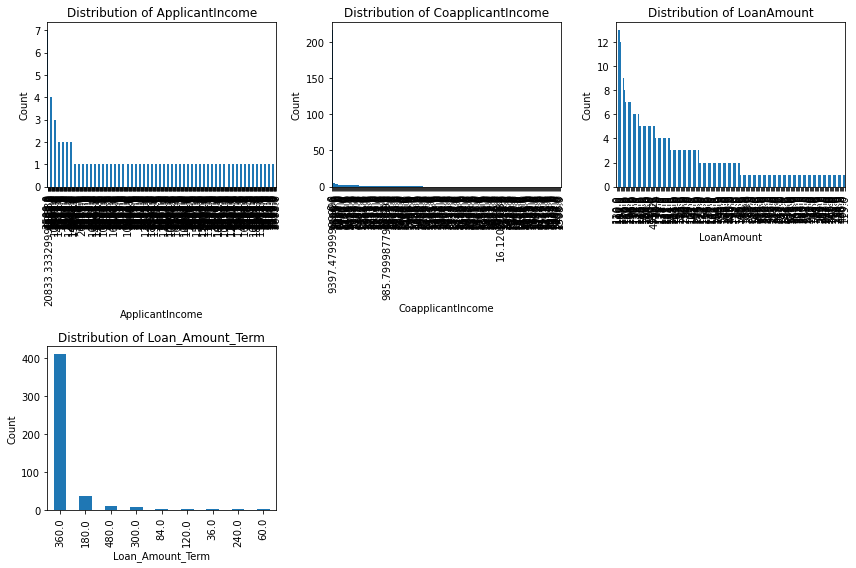

In [139]:
# Set up the plot grid
if len(continuous_vars) > 0:
    n_cols = 3
    n_rows = (len(continuous_vars) - 1) // n_cols + 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

    # Iterate over the columns and create a bar chart for each one
    for i, column in enumerate(continuous_vars):
        row = i // n_cols
        col = i % n_cols
        df[column].value_counts().plot(kind='bar', ax=axs[row, col])
        axs[row, col].set_title('Distribution of {}'.format(column))
        axs[row, col].set_xlabel(column)
        axs[row, col].set_ylabel('Count')

    # Remove any unused subplots
    for i in range(len(continuous_vars), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axs[row, col])

    # Adjust the spacing and display the plot
    fig.tight_layout()
    plt.show()
else:
    print('Error: No columns to plot')

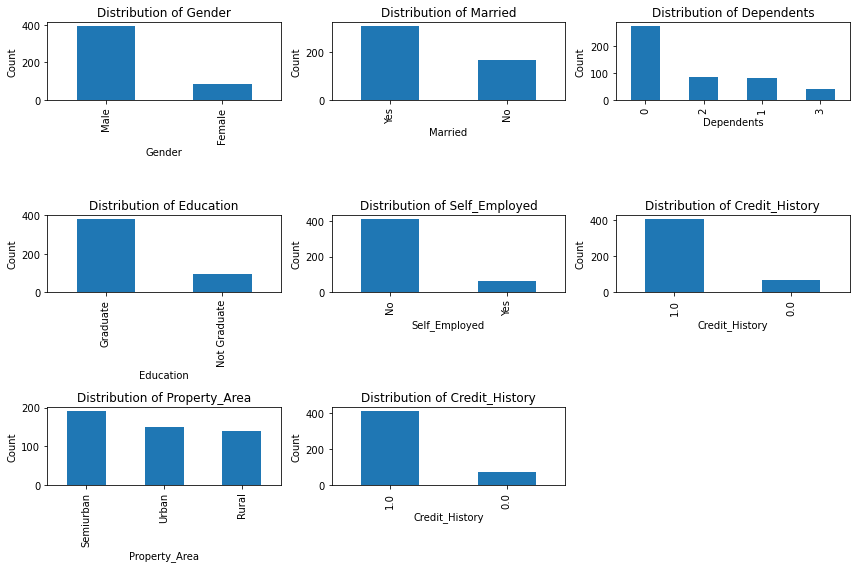

In [143]:
categorical_vars = [
    "Gender","Married",'Dependents',
       'Education',"Self_Employed","Credit_History","Property_Area","Credit_History"
]

target = "Loan_Status"

# Set up the plot grid
if len(categorical_vars) > 0:
    n_cols = 3
    n_rows = (len(categorical_vars) - 1) // n_cols + 1
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(12, 8))

    # Iterate over the columns and create a bar chart for each one
    for i, column in enumerate(categorical_vars):
        row = i // n_cols
        col = i % n_cols
        df[column].value_counts().plot(kind='bar', ax=axs[row, col])
        axs[row, col].set_title('Distribution of {}'.format(column))
        axs[row, col].set_xlabel(column)
        axs[row, col].set_ylabel('Count')

    # Remove any unused subplots
    for i in range(len(categorical_vars), n_rows * n_cols):
        row = i // n_cols
        col = i % n_cols
        fig.delaxes(axs[row, col])

    # Adjust the spacing and display the plot
    fig.tight_layout()
    plt.show()
else:
    print('Error: No columns to plot')

In [144]:
df[df['Dependents']=="3+"]["Dependents"]=3
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [145]:
for i in range(0, df.shape[0]):
    if df['Dependents'].iloc[i] == '3+':
        df['Dependents'].iloc[i] = '3'

In [146]:
def remove_outliers(df, column_name):
    percentile = 99
    upper_threshold = np.percentile(df[column_name], percentile)
    df[column_name] = np.where(df[column_name] > upper_threshold, upper_threshold, df[column_name])
    return df

In [147]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,1.0,Urban,Y


In [148]:
df1 = remove_outliers(df, "ApplicantIncome")
df2 = remove_outliers(df1, "CoapplicantIncome")
df3 = remove_outliers(df2, "LoanAmount")
df4 = remove_outliers(df3, "Loan_Amount_Term")


c:\Users\talkt\anaconda3\envs\jupyter_venv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [149]:
df4.shape

(480, 13)

In [180]:
df5 = df4.reset_index(drop=True)

In [181]:
df5.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,480.000000,480.000000,480.000000,480.000000,480.000000
mean,5093.573646,1475.329737,144.129626,342.050000,0.854167
std,3700.486481,1859.134123,77.447440,65.212401,0.353307
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2898.750000,0.000000,100.000000,360.000000,1.000000
50%,3859.000000,1084.500000,128.000000,360.000000,1.000000
75%,5852.500000,2253.250000,170.000000,360.000000,1.000000
max,20359.069993,9067.670800,495.044100,480.000000,1.000000


In [182]:
df5['Gender_dum'] = df5['Gender'].map({'Male': 1, 'Female': 0})
df5['Married_dum'] = df5['Married'].map({'Yes': 1, 'No': 0})
df5['Education_dum'] = df5['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df5['Self_Employed_dum'] = df5['Self_Employed'].map({'Yes': 1, 'No': 0})
df5['Loan_Status_1'] = df5['Loan_Status'].map({'Y': 1, 'N': 0})

### Claculating the IV value for the variables to find importance of variables or relevance

In [183]:
def calculate_woe_iv(df, var_name, target_name, bin_type='equal_width', num_bins=10):
    """
    Calculates the Weight of Evidence (WOE) and Information Value (IV) for a given variable in a dataframe.

    Args:
        df (pd.DataFrame): The dataframe containing the variable and target.
        var_name (str): The name of the variable to calculate WOE and IV for.
        target_name (str): The name of the binary target variable.
        bin_type (str, optional): The type of binning to use. Options are 'equal_width' for continuous variables 
                                   and 'frequency' for categorical variables. Defaults to 'equal_width'.
        num_bins (int, optional): The number of bins to use for continuous variables. Ignored for categorical variables.
                                  Defaults to 10.

    Returns:
        float: The IV value for the variable.
        pd.DataFrame: A dataframe containing the WOE and IV values for each bin/category of the variable.
    """

    # create a copy of the dataframe to avoid modifying the original data
    df_new = df.copy()

    # calculate the total number of good and bad observations
    total_good = df_new[target_name].sum()
    total_bad = df_new.shape[0] - total_good

    if bin_type == 'equal_width':  # for continuous variables
        # bin the variable into num_bins equal width bins
        _, bins = pd.cut(df_new[var_name], bins=num_bins, retbins=True, duplicates='drop')

        # create a new column with the bin labels
        df_new['bin'] = pd.cut(df_new[var_name], bins=bins, labels=False)

    elif bin_type == 'frequency':  # for categorical variables
        # create a new column with the bin labels
        df_new['bin'] = df_new[var_name]

    else:
        raise ValueError("bin_type should be 'equal_width' or 'frequency'.")

    # calculate the total number of observations in each bin/category
    bin_counts = df_new.groupby('bin')[target_name].agg(['count', 'sum'])
    bin_counts['pct_good'] = bin_counts['sum'] / total_good
    bin_counts['pct_bad'] = (bin_counts['count'] - bin_counts['sum']) / total_bad
    bin_counts['woe'] = np.log(bin_counts['pct_good'] / bin_counts['pct_bad'])
    bin_counts['iv'] = (bin_counts['pct_good'] - bin_counts['pct_bad']) * bin_counts['woe']
    bin_counts['lowers']=bins[:-1]
    bin_counts['uppers']=bins[1:]
    bin_counts['TAR'] = bin_counts['sum'] / bin_counts['count']

    iv = bin_counts['iv'].sum()

    # return the IV and bin_counts dataframe
    return iv, bin_counts[['TAR','pct_good','pct_bad','woe', 'iv','lowers','uppers']]

In [184]:
df5["CoapplicantIncome"] = df5["CoapplicantIncome"].apply(lambda x: 0 if x<0 else x)
max(df5["CoapplicantIncome"])

9067.670799999984

In [187]:
iv1, woe_df1 = calculate_woe_iv(df5, "ApplicantIncome", "Loan_Status_1", bin_type='equal_width', num_bins=10)
woe_df1["Var_name"]="ApplicantIncome"
woe_df1["IV_sum"]=iv1
iv2, woe_df2 = calculate_woe_iv(df5, "CoapplicantIncome", "Loan_Status_1", bin_type='equal_width', num_bins=8)
woe_df2["Var_name"]="CoapplicantIncome"
woe_df2["IV_sum"]=iv2
iv3, woe_df3 = calculate_woe_iv(df5, "LoanAmount", "Loan_Status_1", bin_type='equal_width', num_bins=8)
woe_df3["Var_name"]="LoanAmount"
woe_df3["IV_sum"]=iv3
iv4, woe_df4 = calculate_woe_iv(df5, "Loan_Amount_Term", "Loan_Status_1", bin_type='equal_width', num_bins=4)
woe_df4["Var_name"]="Loan_Amount_Term"
woe_df4["IV_sum"]=iv4

In [188]:
woe_concat = pd.concat([woe_df1,woe_df2,woe_df3,woe_df4], axis=0)
woe_concat

,TAR,pct_good,pct_bad,woe,iv,lowers,uppers,Var_name,IV_sum
bin,,,,,,,,,
0,0.674419,0.087349,0.094595,-0.079684,0.000577,129.790930,2170.906999,ApplicantIncome,0.056134
1,0.713043,0.493976,0.445946,0.102289,0.004913,2170.906999,4191.813999,ApplicantIncome,0.056134
2,0.666667,0.204819,0.229730,-0.114776,0.002859,4191.813999,6212.720998,ApplicantIncome,0.056134
3,0.729730,0.081325,0.067568,0.185329,0.002550,6212.720998,8233.627997,ApplicantIncome,0.056134
4,0.678571,0.057229,0.060811,-0.060708,0.000217,8233.627997,10254.534996,ApplicantIncome,0.056134
5,0.583333,0.021084,0.033784,-0.471450,0.005987,10254.534996,12275.441996,ApplicantIncome,0.056134
6,0.333333,0.003012,0.013514,-1.501070,0.015763,12275.441996,14296.348995,ApplicantIncome,0.056134
7,0.700000,0.021084,0.020270,0.039375,0.000032,14296.348995,16317.255994,ApplicantIncome,0.056134
8,0.857143,0.018072,0.006757,0.983837,0.011133,16317.255994,18338.162994,ApplicantIncome,0.056134


In [189]:
with pd.ExcelWriter('output.xlsx') as writer:
    summary_1.to_excel(writer, sheet_name='WOE_encoding_analysis')
    woe_concat.to_excel(writer, sheet_name='Categorical_var_analysis')

In [190]:
# Define a function to calculate the WoE and IV
def calc_iv(df, var_name, target_name):
    """
    df: pandas DataFrame containing the data
    var_name: name of the categorical variable to calculate IV for
    target_name: name of the target variable (binary)
    """
    # Group the data by the categories of the variable
    grouped = df.groupby(var_name)[target_name].agg(['count', 'sum'])

    # Calculate the proportion of events and non-events in each category
    grouped['event_rate'] = grouped['sum'] / grouped['count']
    grouped['non_event_rate'] = (grouped['count'] - grouped['sum']) / grouped['count']

    # Calculate the WoE for each category
    grouped['woe'] = np.log(grouped['event_rate'] / grouped['non_event_rate'])

    # Calculate the IV for the variable
    iv = sum((grouped['event_rate'] - grouped['non_event_rate']) * grouped['woe'])
    return iv


In [191]:
iv = calc_iv(df5, 'Gender', 'Loan_Status_1')
print("IV:",'Gender', iv)
iv = calc_iv(df5, 'Married', 'Loan_Status_1')
print("IV:",'Married', iv)
iv = calc_iv(df5, 'Dependents', 'Loan_Status_1')
print("IV:",'Dependents', iv)
iv = calc_iv(df5, 'Education', 'Loan_Status_1')
print("IV:",'Education', iv)
iv = calc_iv(df5, 'Self_Employed', 'Loan_Status_1')
print("IV:",'Self_Employed', iv)
iv = calc_iv(df5, 'Credit_History', 'Loan_Status_1')
print("IV:",'Credit_History', iv)

IV: Gender 0.49322729676529287
IV: Married 0.5772169889793585
IV: Dependents 1.3696789435833643
IV: Education 0.5027453876392447
IV: Self_Employed 0.5216139448696455
IV: Credit_History 2.542857081872539


In [230]:
def create_binned_variable(df, column_name, num_bins):
    # Compute bin edges
    bin_edges = pd.qcut(df[column_name], q=num_bins, duplicates='drop').value_counts().sort_index().index
    
    # Create bin labels
    bin_labels = [f'Decile{i}' for i in range(1, num_bins+1)]
    print(bin_labels)
    print(bin_edges)
    # Create binned variable
    df[column_name + '_binned'] = pd.cut(df[column_name], bins=[edge.left for edge in bin_edges]+[bin_edges[-1].right], labels=bin_labels)

In [245]:
create_binned_variable(df5,"ApplicantIncome",8)
create_binned_variable(df5,"CoapplicantIncome",2)
create_binned_variable(df5,"Loan_Amount_Term",2)


['Decile1', 'Decile2', 'Decile3', 'Decile4', 'Decile5', 'Decile6', 'Decile7', 'Decile8']
CategoricalIndex([  (149.999, 2376.5],   (2376.5, 2898.75],
                  (2898.75, 3330.375],  (3330.375, 3859.0],
                     (3859.0, 4583.0],    (4583.0, 5852.5],
                    (5852.5, 8629.25], (8629.25, 20359.07]],
                 categories=[(149.999, 2376.5], (2376.5, 2898.75], (2898.75, 3330.375], (3330.375, 3859.0], (3859.0, 4583.0], (4583.0, 5852.5], (5852.5, 8629.25], (8629.25, 20359.07]], ordered=True, dtype='category')
['Decile1', 'Decile2']
CategoricalIndex([(-0.001, 1084.5], (1084.5, 9067.671]], categories=[(-0.001, 1084.5], (1084.5, 9067.671]], ordered=True, dtype='category')
['Decile1', 'Decile2']
CategoricalIndex([(35.999, 360.0], (360.0, 480.0]], categories=[(35.999, 360.0], (360.0, 480.0]], ordered=True, dtype='category')


In [248]:
def create_woe_encoded_variable(df, binned_column, target_column):
    # Calculate the total count of positive and negative cases for each bin
    bin_counts = df.groupby(binned_column)[target_column].value_counts().unstack().fillna(0)
    
    # Calculate the total count of positive and negative cases for the entire dataset
    total_positives = bin_counts.sum(axis=0)[1]
    total_negatives = bin_counts.sum(axis=0)[0]
    
    # Calculate the percentage of positive and negative cases for each bin
    bin_counts['Percentage_Positive'] = bin_counts[1] / total_positives
    bin_counts['Percentage_Negative'] = bin_counts[0] / total_negatives
    
    # Calculate the Weight of Evidence (WOE) for each bin
    bin_counts['WOE'] = np.log(bin_counts['Percentage_Positive'] / bin_counts['Percentage_Negative'])
    
    # Create a dictionary mapping the binned values to their respective WOE values
    woe_mapping = bin_counts['WOE'].to_dict()
    
    # Create the WOE encoded variable based on the binned column
    df[binned_column + '_WOE'] = df[binned_column].map(woe_mapping)

In [247]:
target = "Loan_Status_1"

In [251]:
df5.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_dum', 'Married_dum', 'Education_dum', 'Self_Employed_dum',
       'Loan_Status_1', 'ApplicantIncome_binned', 'CoapplicantIncome_binned',
       'Loan_Amount_Term_binned', 'Credit_History_binned',
       'ApplicantIncome_binned_WOE'],
      dtype='object')

In [253]:
create_woe_encoded_variable(df5,"ApplicantIncome_binned",target)
create_woe_encoded_variable(df5,"CoapplicantIncome_binned",target)
create_woe_encoded_variable(df5,"Loan_Amount_Term_binned",target)

In [254]:
df5

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,...,Education_dum,Self_Employed_dum,Loan_Status_1,ApplicantIncome_binned,CoapplicantIncome_binned,Loan_Amount_Term_binned,Credit_History_binned,ApplicantIncome_binned_WOE,CoapplicantIncome_binned_WOE,Loan_Amount_Term_binned_WOE
0,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,...,1,0,0,Decile5,Decile2,Decile1,Decile1,-0.114776,0.079380,0.043448
1,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,...,1,1,1,Decile3,Decile1,Decile1,Decile1,0.381661,-0.077035,0.043448
2,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,...,0,0,1,Decile2,Decile2,Decile1,Decile1,0.039375,0.079380,0.043448
3,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,...,1,0,1,Decile7,Decile1,Decile1,Decile1,0.039375,-0.077035,0.043448
4,LP001011,Male,Yes,2,Graduate,Yes,5417.0,4196.0,267.0,360.0,...,1,1,1,Decile6,Decile2,Decile1,Decile1,0.268217,0.079380,0.043448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900.0,0.0,71.0,360.0,...,1,0,1,Decile3,Decile1,Decile1,Decile1,0.381661,-0.077035,0.043448
476,LP002979,Male,Yes,3,Graduate,No,4106.0,0.0,40.0,180.0,...,1,0,1,Decile5,Decile1,Decile1,Decile1,-0.114776,-0.077035,0.043448
477,LP002983,Male,Yes,1,Graduate,No,8072.0,240.0,253.0,360.0,...,1,0,1,Decile7,Decile1,Decile1,Decile1,0.039375,-0.077035,0.043448
478,LP002984,Male,Yes,2,Graduate,No,7583.0,0.0,187.0,360.0,...,1,0,1,Decile7,Decile1,Decile1,Decile1,0.039375,-0.077035,0.043448


In [257]:
df6 = df5
df6.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_dum', 'Married_dum', 'Education_dum', 'Self_Employed_dum',
       'Loan_Status_1', 'ApplicantIncome_binned', 'CoapplicantIncome_binned',
       'Loan_Amount_Term_binned', 'Credit_History_binned',
       'ApplicantIncome_binned_WOE', 'CoapplicantIncome_binned_WOE',
       'Loan_Amount_Term_binned_WOE'],
      dtype='object')

In [258]:
df6 = df6.reset_index(drop=True)

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [259]:
X = df6[['Gender_dum','Married_dum','Education_dum','Self_Employed_dum',
        'ApplicantIncome_binned_WOE','CoapplicantIncome_binned_WOE',
        'Loan_Amount_Term_binned_WOE']]

y = df6[['Loan_Status_1']]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [263]:
# Create a logistic regression model
logreg = LogisticRegression()


In [264]:
# Fit the model on the training data
logreg.fit(X_train, y_train)

c:\Users\talkt\anaconda3\envs\jupyter_venv\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [265]:
# Make predictions on the testing data
y_pred = logreg.predict(X_test)

In [266]:
# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7083333333333334


In [268]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.04      0.07        28
           1       0.71      0.99      0.83        68

    accuracy                           0.71        96
   macro avg       0.61      0.51      0.45        96
weighted avg       0.65      0.71      0.61        96

